In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [57]:
read_data = pd.read_csv('heart.csv')
print(read_data)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0     63    1   3     145   233    1        0       150      0      2.3   
1     37    1   2     130   250    0        1       187      0      3.5   
2     41    0   1     130   204    0        0       172      0      1.4   
3     56    1   1     120   236    0        1       178      0      0.8   
4     57    0   0     120   354    0        1       163      1      0.6   
..   ...  ...  ..     ...   ...  ...      ...       ...    ...      ...   
298   57    0   0     140   241    0        1       123      1      0.2   
299   45    1   3     110   264    0        1       132      0      1.2   
300   68    1   0     144   193    1        1       141      0      3.4   
301   57    1   0     130   131    0        1       115      1      1.2   
302   57    0   1     130   236    0        0       174      0      0.0   

     slope  caa  thall  output  
0        0    0      1       1  
1        0    0      2       1  


In [58]:
read_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
read_data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [60]:
read_data.shape

(303, 14)

In [61]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
read_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [63]:
read_data.dropna(inplace = True)

In [64]:
read_data.drop_duplicates(inplace = True)

In [65]:
read_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
caa         0
thall       0
output      0
dtype: int64

In [66]:
read_data['output'].value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [67]:
read_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: xlabel='age', ylabel='chol'>

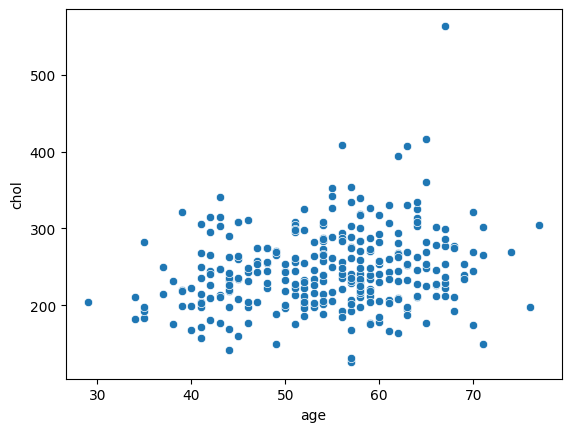

In [68]:
sns.scatterplot(x='age', y='chol', data=read_data)

<Axes: xlabel='cp', ylabel='age'>

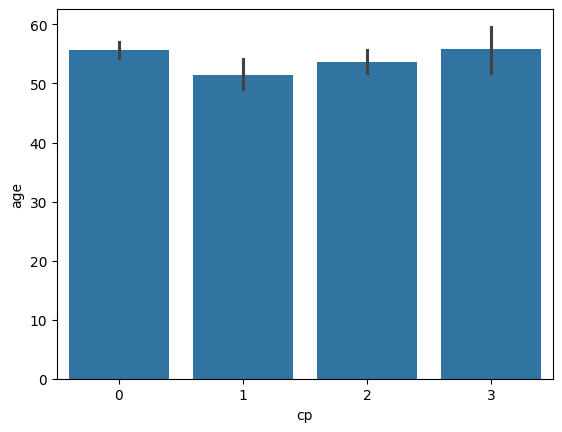

In [69]:
sns.barplot(x='cp', y='age', data=read_data)

<Axes: xlabel='output', ylabel='chol'>

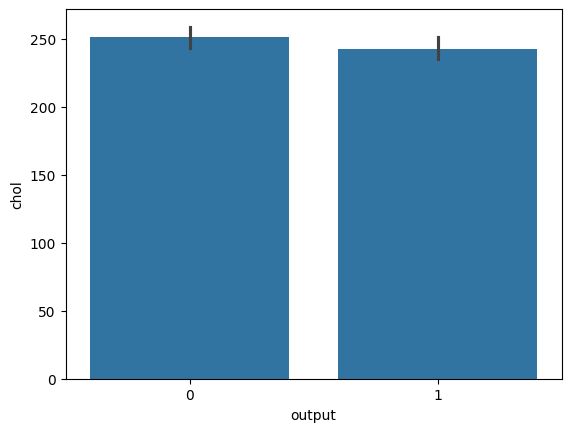

In [70]:
sns.barplot(x='output', y='chol', data=read_data)

<Axes: xlabel='output', ylabel='cp'>

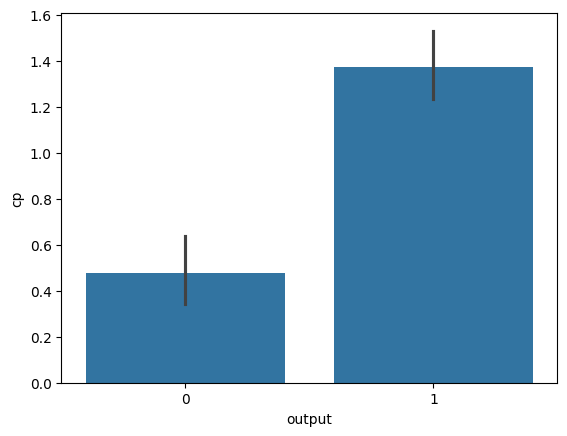

In [71]:
sns.barplot(x='output', y='cp', data=read_data)

<Axes: xlabel='chol', ylabel='trtbps'>

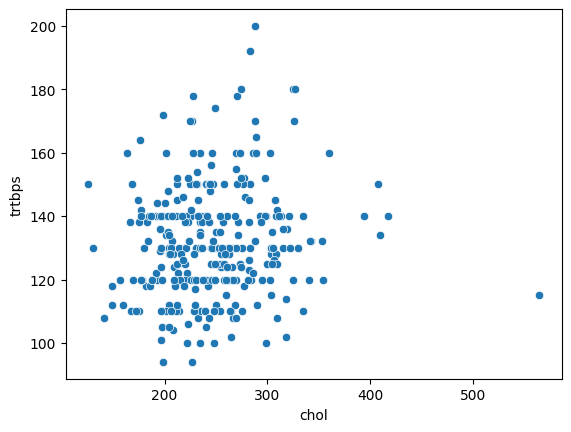

In [72]:
sns.scatterplot(x='chol', y='trtbps', data=read_data)

In [73]:
x = read_data.drop(['output'], axis = 1)
y = read_data['output']

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2 , random_state=5)

In [75]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [76]:
model = LogisticRegression()

In [77]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [78]:
model.score(xtrain, ytrain)

0.8464730290456431

In [79]:
model.score(xtest, ytest)

0.819672131147541

In [80]:
y_train_pred = model.predict(xtrain)


In [81]:
y_test_pred = model.predict(xtest)

In [82]:
accuracy_score(ytrain, y_train_pred)

0.8464730290456431

In [83]:
accuracy_score(ytest, y_test_pred)

0.819672131147541

In [84]:
mean_squared_error(ytrain, y_train_pred)

0.15352697095435686

In [85]:
mean_squared_error(ytest, y_test_pred)

0.18032786885245902

In [86]:
a = classification_report(ytest, y_test_pred)
print(a)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [87]:
c = confusion_matrix(ytest, y_test_pred)
print(c)

[[26  8]
 [ 3 24]]


In [88]:
import pickle
with open('project_model.pkl', 'wb') as file:
    pickle.dump(model, file)

<Axes: >

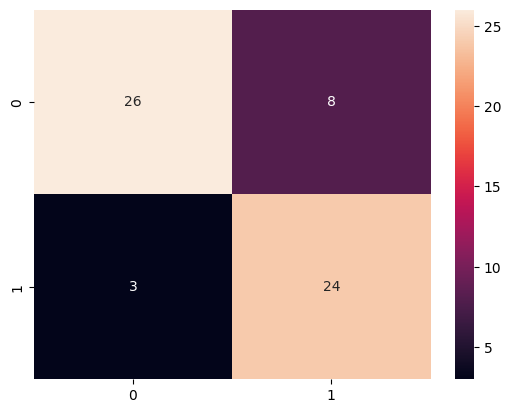

In [89]:
sns.heatmap(c, annot=True, fmt='d')

In [90]:
sv = SVC()

In [91]:
sv.fit(xtrain, ytrain)

SVC()

In [92]:
sv.score(xtest, ytest)

0.8032786885245902

In [93]:
a= sv.predict(xtest)
print(a)

[1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1]


In [94]:
rfc = RandomForestClassifier(n_estimators=200)

In [95]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=200)

In [96]:
rfc.score(xtest, ytest)

0.8032786885245902

In [97]:
b= rfc.predict(xtest)
print(b)

[1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1]


In [98]:
rfm = cross_val_score(rfc, X= xtrain, y=ytrain, cv= 10)

In [99]:
rfm.mean()

0.8048333333333332

In [100]:
kn = KNeighborsClassifier(n_neighbors=5)

In [101]:
kn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [102]:
kn.score(xtest, ytest)

0.7868852459016393

In [103]:
read_data.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [104]:
input_features = [[29,1,0,120,190,0,1,130,1,1,3,0,0]]

In [105]:
numpy_array = np.array(input_features)

In [106]:
reshape_array = numpy_array.reshape(1,-1)

In [107]:
prediction = kn.predict(reshape_array)
print(prediction)

[1]


In [108]:
if prediction[0] == 0:
    print("you have lower risk of getting heart attack")
else:
    print("Warning! you have high risk of getting heart attack")

Warning! you have high risk of getting heart attack
